# Initialization

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse, Circle
from matplotlib.colors import ListedColormap
from matplotlib import transforms
import seaborn as sns
import ast

%matplotlib inline

In [2]:
df = pd.read_excel("SpaceX_ML_Predict_Random_Seeds.xlsx", header=[0,1,2], index_col=0, sheet_name="Accuracies")
df.head()

Logistic Regression                                \
                            All            Selected             
                          Train      Test     Train      Test   
Random Seed                                                     
0                      0.936364  0.785714  0.918182  0.785714   
1                      0.900000  0.821429  0.927273  0.821429   
4                      0.900000  0.714286  0.918182  0.785714   
11                     0.872727  0.928571  0.890909  0.928571   
12                     0.863636  0.892857  0.881818  0.928571   

            Support Vector Machine                                \
                               All            Selected             
                             Train      Test     Train      Test   
Random Seed                                                        
0                         0.936364  0.750000  0.945455  0.785714   
1                         0.909091  0.750000  0.927273  0.821429   
4                         0.909091  0.785714  0.936364  0.785714   
11                        0.872727  0.928571  0.927273  0.964286   
12                        0.872727  0.892857  0.936364  0.928571   

            Decision Tree                               K-Nearest Neighbors  \
                      All            Selected                           All   
                    Train      Test     Train      Test               Train   
Random Seed                                                                   
0                0.954545  0.785714  0.954545  0.821429            0.927273   
1                0.927273  0.857143  0.927273  0.821429            0.909091   
4                0.936364  0.785714  0.936364  0.785714            0.936364   
11               0.909091  0.928571  0.927273  1.000000            0.881818   
12               0.909091  0.928571  0.936364  0.928571            0.881818   

                                           
                       Selected            
                 Test     Train      Test  
Random Seed                                
0            0.785714  0.936364  0.785714  
1            0.821429  0.900000  0.821429  
4            0.714286  0.918182  0.785714  
11           0.928571  0.881818  0.964286  
12           0.928571  0.900000  0.892857

In [3]:
models = ['LR.all', 'LR.feat', 'SVM.all', 'SVM.feat', 'DT.all', 'DT.feat', 'KNN.all', 'KNN.feat']

# Analysis

## Random Seeds

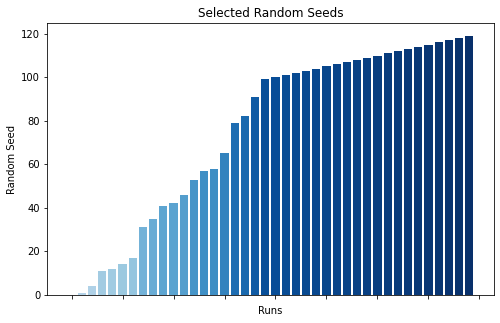

In [4]:
cmp_full = plt.get_cmap('Blues', 512)
cmp = ListedColormap(cmp_full(np.linspace(0.3, 1, 358)))
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

fig, ax = plt.subplots(figsize=(8,5))
fig = plt.bar(range(len(df.index)), df.index, color=cmp(rescale(df.index)))
ax.xaxis.set_ticklabels([])
ax.set_xlabel("Runs")
ax.set_ylabel("Random Seed")
ax.set_title("Selected Random Seeds")

plt.show()

## Performance Sensitivity

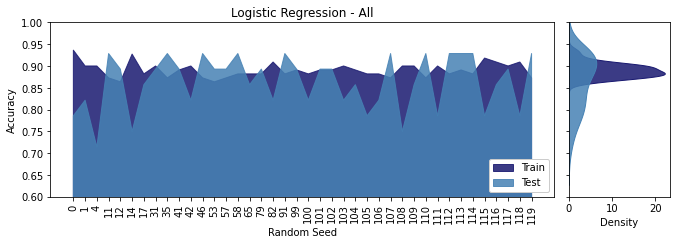

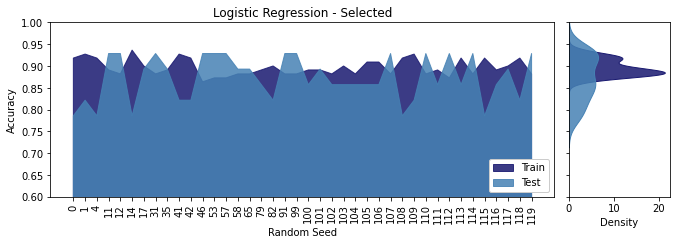

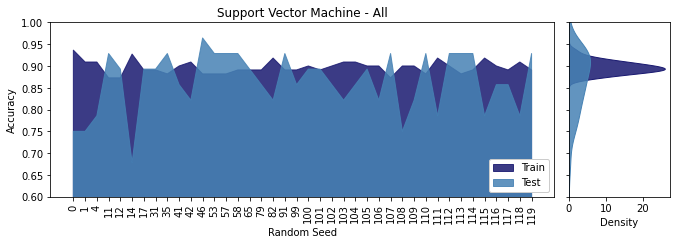

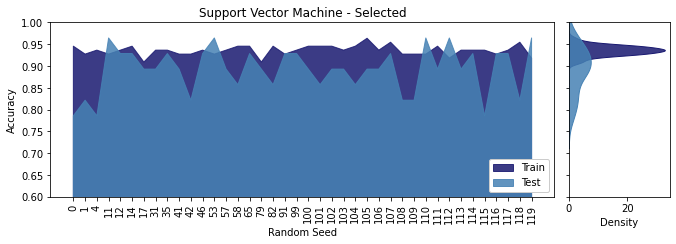

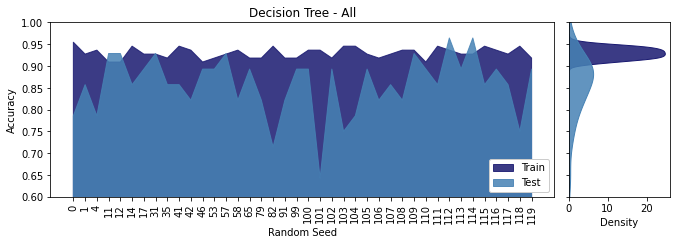

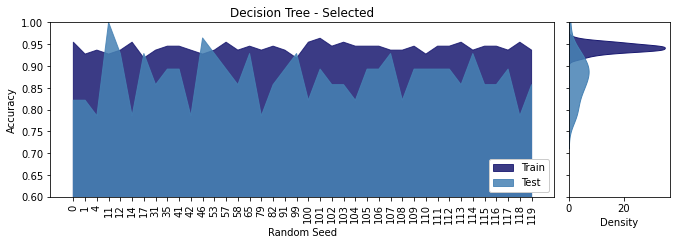

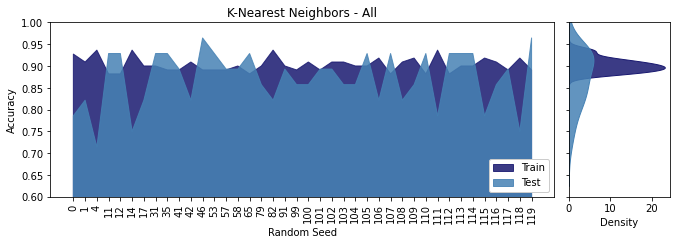

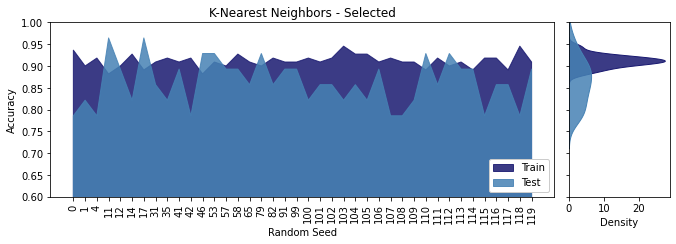

In [5]:
for i in range(len(df.columns.get_level_values(1)[::2])):
    
    model = df.columns.get_level_values(0)[::2][i]
    selector = df.columns.get_level_values(1)[::2][i]
    
    fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(9.5,3.5), gridspec_kw={'width_ratios': [5,1]})

    ax1.fill_between([str(i) for i in df.index.tolist()], df[model, selector, 'Train'], alpha=0.85, color='midnightblue')
    ax1.fill_between([str(i) for i in df.index.tolist()], df[model, selector, 'Test'], alpha=0.85, color='steelblue')
    ax1.set_ylim(0.6,1)
    ax1.set_xlabel('Random Seed')
    ax1.tick_params(axis='x', labelrotation=90)
    ax1.set_ylabel('Accuracy')
    ax1.set_title(df.columns.get_level_values(0)[::2][i] + " - " + df.columns.get_level_values(1)[::2][i])
    ax1.legend(('Train', 'Test'), framealpha=1, loc='lower right')
    
    sns.kdeplot(y=df.iloc[:,::2].iloc[:,i], fill=True, color='midnightblue', alpha=0.85, ax=ax2)
    sns.kdeplot(y=df.iloc[:,1::2].iloc[:,i], fill=True, color='steelblue', alpha=0.85, ax=ax2)
    
    fig.tight_layout()

    plt.show()

## Performance Statistics

In [6]:
df_stats = df.describe().loc[['mean', 'std'],:]
df_stats

Logistic Regression                               Support Vector Machine  \
                     All            Selected                              All   
                   Train      Test     Train      Test                  Train   
mean            0.890227  0.862500  0.896591  0.871429               0.897045   
std             0.016390  0.060819  0.018720  0.050378               0.014613   

                                   Decision Tree                      \
                Selected                     All            Selected   
          Test     Train      Test         Train      Test     Train   
mean  0.863393  0.935682  0.891071      0.929773  0.857143  0.941364   
std   0.066638  0.011534  0.051755      0.012350  0.067181  0.010283   

               K-Nearest Neighbors                                
                               All            Selected            
          Test               Train      Test     Train      Test  
mean  0.873214            0.902955  0.870536  0.911364  0.861607  
std   0.051755            0.016261  0.062484  0.014810  0.051905

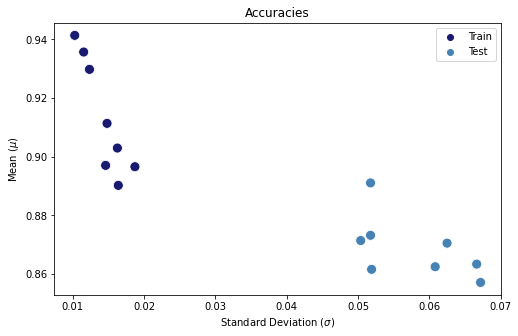

In [7]:
T = df_stats.transpose()
pos_dict = {0: [-1, 'right'], 1: [-1, 'right'], 2: [1, 'left'], 3: [1, 'left'], 4: [-1, 'right'], 5: [-1, 'right'], 6: [1, 'left'], 7: [1, 'left']}

fig, ax = plt.subplots(figsize=(8,5))
fig = sns.scatterplot(x='std', y='mean', data=T, hue=T.index.get_level_values(2), palette=['midnightblue', 'steelblue'], s=100)
ax.set_xlabel(r'Standard Deviation ($\sigma$)')
ax.set_ylabel(r'Mean ($\mu$)')
ax.set_title("Accuracies")

#for i in range(8):
#    plt.text(T.iloc[::2,1][i]+0.0008, T.iloc[::2,0][i], s=models[i], fontsize=8)
#    plt.text(T.iloc[1::2,1][i]+0.0008, T.iloc[1::2,0][i], s=models[i], fontsize=8)

plt.show()

## Bias and Variance

In [8]:
# Copy dataframe
BV = df.copy(deep=True)

# Variance
BV.iloc[:,1::2] = BV.iloc[:,::2].values - BV.iloc[:,1::2].values

# Bias
BV.iloc[:,::2] = 1-BV.iloc[:,::2]

# rename columns
BV.rename(columns={'Train': 'Bias', 'Test': 'Variance'}, inplace=True)
BV.head()

Logistic Regression                                \
                            All            Selected             
                           Bias  Variance      Bias  Variance   
Random Seed                                                     
0                      0.063636  0.150649  0.081818  0.132468   
1                      0.100000  0.078571  0.072727  0.105844   
4                      0.100000  0.185714  0.081818  0.132468   
11                     0.127273 -0.055844  0.109091 -0.037662   
12                     0.136364 -0.029221  0.118182 -0.046753   

            Support Vector Machine                                \
                               All            Selected             
                              Bias  Variance      Bias  Variance   
Random Seed                                                        
0                         0.063636  0.186364  0.054545  0.159740   
1                         0.090909  0.159091  0.072727  0.105844   
4                         0.090909  0.123377  0.063636  0.150649   
11                        0.127273 -0.055844  0.072727 -0.037013   
12                        0.127273 -0.020130  0.063636  0.007792   

            Decision Tree                               K-Nearest Neighbors  \
                      All            Selected                           All   
                     Bias  Variance      Bias  Variance                Bias   
Random Seed                                                                   
0                0.045455  0.168831  0.045455  0.133117            0.072727   
1                0.072727  0.070130  0.072727  0.105844            0.090909   
4                0.063636  0.150649  0.063636  0.150649            0.063636   
11               0.090909 -0.019481  0.072727 -0.072727            0.118182   
12               0.090909 -0.019481  0.063636  0.007792            0.118182   

                                           
                       Selected            
             Variance      Bias  Variance  
Random Seed                                
0            0.141558  0.063636  0.150649  
1            0.087662  0.100000  0.078571  
4            0.222078  0.081818  0.132468  
11          -0.046753  0.118182 -0.082468  
12          -0.046753  0.100000  0.007143

In [9]:
BV_stats = BV.describe().loc[['mean', 'std'],:]
BV_stats

Logistic Regression                               Support Vector Machine  \
                     All            Selected                              All   
                    Bias  Variance      Bias  Variance                   Bias   
mean            0.109773  0.027727  0.103409  0.025162               0.102955   
std             0.016390  0.072861  0.018720  0.067108               0.014613   

                                   Decision Tree                      \
                Selected                     All            Selected   
      Variance      Bias  Variance          Bias  Variance      Bias   
mean  0.033653  0.064318  0.044610      0.070227  0.072630  0.058636   
std   0.079149  0.011534  0.055352      0.012350  0.073926  0.010283   

               K-Nearest Neighbors                                
                               All            Selected            
      Variance                Bias  Variance      Bias  Variance  
mean  0.068149            0.097045  0.032419  0.088636  0.049756  
std   0.056411            0.016261  0.076691  0.014810  0.062981

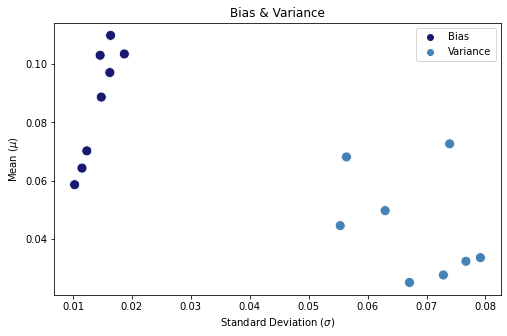

In [10]:
T_BV = BV_stats.transpose()

fig, ax = plt.subplots(figsize=(8,5))
fig = sns.scatterplot(x='std', y='mean', data=T_BV, hue=T_BV.index.get_level_values(2), palette=['midnightblue', 'steelblue'], s=100)
ax.set_xlabel(r'Standard Deviation ($\sigma$)')
ax.set_ylabel(r'Mean ($\mu$)')
ax.set_title("Bias & Variance")

#for i in range(8):
#    plt.text(T_BV.iloc[::2,1][i]+0.0008, T_BV.iloc[::2,0][i], s=models[i], fontsize=8)
#    plt.text(T_BV.iloc[1::2,1][i]+0.0008, T_BV.iloc[1::2,0][i], s=models[i], fontsize=8)

plt.show()

## Bias-Variance Tradeoff

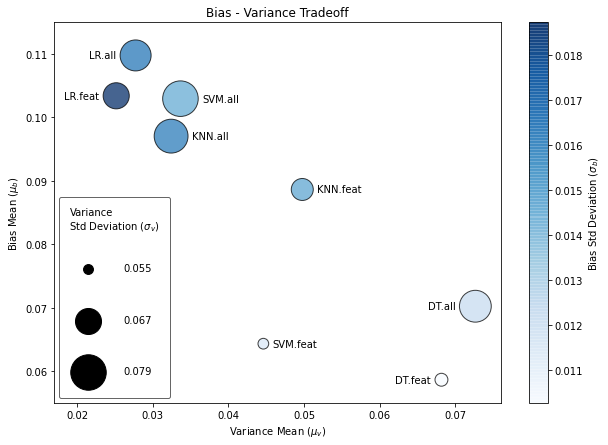

In [11]:
# initialize
def varstddev_size(i):
    return ((i - BV_stats.iloc[1,1::2].min())/(BV_stats.iloc[1,1::2].max() - BV_stats.iloc[1,1::2].min())+0.1)*1150
pos_dict = {0: [-1, 'right'], 1: [-1, 'right'], 2: [1, 'left'], 3: [1, 'left'], 4: [-1, 'right'], 5: [-1, 'right'], 6: [1, 'left'], 7: [1, 'left']}

# create figure
fig, ax = plt.subplots(figsize=(10,7))

# create scatter plot
fig = plt.scatter(x=BV_stats.iloc[0,1::2],
                  y=BV_stats.iloc[0,::2], 
                  s=varstddev_size(BV_stats.iloc[1,1::2]), 
                  c=BV_stats.iloc[1,::2],
                  cmap='Blues',
                  alpha=0.75,
                  edgecolors='black'
                 )
ax.set_xlim(0.017,0.076)
ax.set_ylim(0.055,0.115)
ax.set_xlabel(r'Variance Mean ($\mu_v$)')
ax.set_ylabel(r'Bias Mean ($\mu_b$)')
ax.set_title("Bias - Variance Tradeoff")
plt.colorbar(label=r'Bias Std Deviation ($\sigma_b$)')

# create legend
vsds = [round(i/2 * (BV_stats.iloc[1,1::2].max() - BV_stats.iloc[1,1::2].min()) + BV_stats.iloc[1,1::2].min(), 3) for i in range(3)]
for vsd in vsds:
    plt.scatter([],
                [],
                s=varstddev_size(vsd),
                c="k",
                label=str(vsd)
               )

h, l = ax.get_legend_handles_labels()
plt.legend(h[:],
           l[:],
           labelspacing=2,
           title='Variance\n'+r'Std Deviation ($\sigma_v$)',
           borderpad=1, scatteryoffsets=[0.07],
           frameon=True,
           framealpha=0.6,
           edgecolor="k",
           facecolor="w",
           handletextpad=2.5,
           loc='lower left',
           handleheight=4.5
          )

# print classifier model labels
for i in range(8):
    r = ((varstddev_size(BV_stats.iloc[1,1::2][i]))**0.5)/2
    offset = ax.transData.inverted().transform((ax.transData.transform((BV_stats.iloc[0,1::2][i], 0))[0] + pos_dict[i][0]*(r+4), 0))[0]
    plt.text(offset,
             BV_stats.iloc[0,::2][i],
             s=models[i],
             fontsize=10,
             ha=pos_dict[i][1],
             va='center',
             transform=ax.transData
            )

plt.show()

# Best Model

## Parameters

In [12]:
df_bp = pd.read_excel("SpaceX_ML_Predict_Random_Seeds.xlsx", header=[0,1], index_col=0, sheet_name="Best Parameters")
df_bp.head()

Logistic Regression  \
                                                           All   
Random Seed                                                      
0            {'lr__C': 0.1, 'lr__penalty': 'l2', 'lr__solve...   
1            {'lr__C': 0.01, 'lr__penalty': 'l2', 'lr__solv...   
4            {'lr__C': 0.01, 'lr__penalty': 'l2', 'lr__solv...   
11           {'lr__C': 0.01, 'lr__penalty': 'l2', 'lr__solv...   
12           {'lr__C': 0.01, 'lr__penalty': 'l2', 'lr__solv...   

                                                                \
                                                      Selected   
Random Seed                                                      
0            {'lr__C': 0.01, 'lr__penalty': 'l2', 'lr__solv...   
1            {'lr__C': 0.01, 'lr__penalty': 'l2', 'lr__solv...   
4            {'lr__C': 10, 'lr__penalty': 'l2', 'lr__solver...   
11           {'lr__C': 0.01, 'lr__penalty': 'l2', 'lr__solv...   
12           {'lr__C': 100, 'lr__penalty': 'l2', 'lr__solve...   

                                        Support Vector Machine  \
                                                           All   
Random Seed                                                      
0            {'svm__C': 1.0, 'svm__gamma': 0.01, 'svm__kern...   
1            {'svm__C': 1.0, 'svm__gamma': 0.01, 'svm__kern...   
4            {'svm__C': 1.0, 'svm__gamma': 0.01, 'svm__kern...   
11           {'svm__C': 1.0, 'svm__gamma': 0.01, 'svm__kern...   
12           {'svm__C': 1.0, 'svm__gamma': 0.01, 'svm__kern...   

                                                                \
                                                      Selected   
Random Seed                                                      
0            {'selector__k': 10, 'selector__score_func': <f...   
1            {'selector__k': 10, 'selector__score_func': <f...   
4            {'selector__k': 10, 'selector__score_func': <f...   
11           {'selector__k': 10, 'selector__score_func': <f...   
12           {'selector__k': 10, 'selector__score_func': <f...   

                                                 Decision Tree  \
                                                           All   
Random Seed                                                      
0            {'dt__criterion': 'gini', 'dt__max_depth': 6, ...   
1            {'dt__criterion': 'gini', 'dt__max_depth': 6, ...   
4            {'dt__criterion': 'gini', 'dt__max_depth': 14,...   
11           {'dt__criterion': 'gini', 'dt__max_depth': 2, ...   
12           {'dt__criterion': 'entropy', 'dt__max_depth': ...   

                                                                \
                                                      Selected   
Random Seed                                                      
0            {'dt__criterion': 'gini', 'dt__max_depth': 12,...   
1            {'dt__criterion': 'gini', 'dt__max_depth': 2, ...   
4            {'dt__criterion': 'gini', 'dt__max_depth': 2, ...   
11           {'dt__criterion': 'gini', 'dt__max_depth': 6, ...   
12           {'dt__criterion': 'gini', 'dt__max_depth': 4, ...   

                                           K-Nearest Neighbors  \
                                                           All   
Random Seed                                                      
0            {'knn__algorithm': 'auto', 'knn__n_neighbors':...   
1            {'knn__algorithm': 'auto', 'knn__n_neighbors':...   
4            {'knn__algorithm': 'auto', 'knn__n_neighbors':...   
11           {'knn__algorithm': 'auto', 'knn__n_neighbors':...   
12           {'knn__algorithm': 'auto', 'knn__n_neighbors':...   

                                                                
                                                      Selected  
Random Seed                                                     
0            {'knn__algorithm': 'auto', 'knn__n_neighbors':...  
1            {'knn__algorithm': 'auto', 'knn__n_neighbors':...  
4            {'

In [13]:
df_svm_feat = pd.DataFrame(index=df.index,
                           columns=pd.MultiIndex.from_tuples((("Accuracies", "Train"),
                                                              ("Accuracies", "Test"),
                                                              ("Tradeoff", "Bias"),
                                                              ("Tradeoff", "Variance"),
                                                              ("Parameters", "C"),
                                                              ("Parameters", "gamma"),
                                                              ("Parameters", "kernel"))))

for a in ("Train", "Test"):
    df_svm_feat[("Accuracies", a)] = df[("Support Vector Machine", "Selected", a)]

for t in ("Bias", "Variance"):
    df_svm_feat[("Tradeoff", t)] = BV[("Support Vector Machine", "Selected", t)]

for p in ("C", "gamma", "kernel"):
    df_svm_feat[("Parameters", p)] =\
    [ast.literal_eval(df_bp[("Support Vector Machine", "Selected")][rs].replace("<", "'").replace(">", "'"))['svm__'+p] for rs in df_bp.index]

df_svm_feat.head(1)

Accuracies            Tradeoff          Parameters             
                 Train      Test      Bias Variance          C gamma kernel
Random Seed                                                                
0             0.945455  0.785714  0.054545  0.15974  31.622777   0.1    rbf

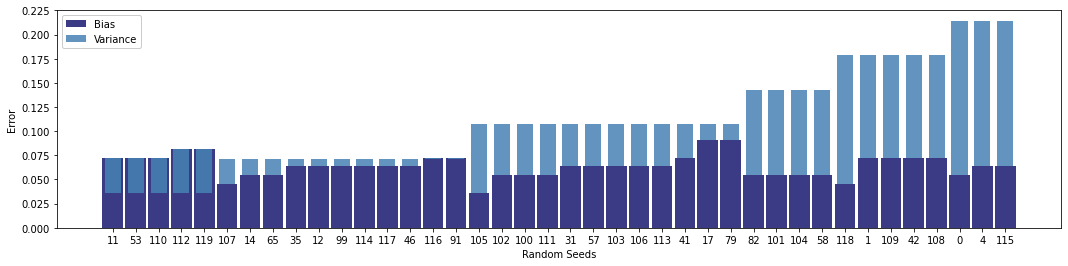

Accuracies            Tradeoff             Parameters         \
                 Train      Test      Bias  Variance            C  gamma   
Random Seed                                                                
11            0.927273  0.964286  0.072727 -0.037013     0.001000  10.00   
53            0.927273  0.964286  0.072727 -0.037013     0.001000  10.00   
110           0.927273  0.964286  0.072727 -0.037013  1000.000000   0.01   
112           0.918182  0.964286  0.081818 -0.046104     0.031623   1.00   
119           0.918182  0.964286  0.081818 -0.046104     1.000000   1.00   
107           0.954545  0.928571  0.045455  0.025974     0.001000  10.00   
14            0.945455  0.928571  0.054545  0.016883  1000.000000   0.10   
65            0.945455  0.928571  0.054545  0.016883    31.622777   0.10   
35            0.936364  0.928571  0.063636  0.007792     0.031623   1.00   
12            0.936364  0.928571  0.063636  0.007792     0.031623   1.00   

                    
            kernel  
Random Seed         
11            poly  
53            poly  
110            rbf  
112           poly  
119            rbf  
107           poly  
14             rbf  
65             rbf  
35            poly  
12            poly

In [14]:
temp = df_svm_feat.sort_values([("Accuracies", "Test"), ("Accuracies", "Train")], ascending=False)

fig, ax = plt.subplots(figsize=(18,4))

ax.bar(temp.index.astype('str'), temp[("Tradeoff", "Bias")], color="midnightblue", alpha=0.85, width=0.9)
ax.bar(temp.index.astype('str'), temp[("Tradeoff", "Variance")], bottom=temp[("Tradeoff", "Bias")], color="steelblue", alpha=0.85, width=0.7)
ax.set_xlabel("Random Seeds")
ax.set_ylabel("Error")
ax.legend(("Bias", "Variance"), framealpha=1, loc='upper left')

plt.show()
temp.head(10)

Most frequent model having overall highest test score:
* C=0.001, gamma=10, kernel=poly    (Random Seeds 11, 53)

Best model having highest test score which is less than training score:
* C=0.001, gamma=10, kernel=poly    (Random Seed 107)

In [15]:
df_svm_feat.sort_values([("Tradeoff", "Bias"),
                         ("Tradeoff", "Variance"),
                         ("Accuracies", "Test"),
                         ("Accuracies", "Train")], ascending=[True, True, False, False]).head(10)

Accuracies            Tradeoff             Parameters             
                 Train      Test      Bias  Variance            C gamma kernel
Random Seed                                                                   
105           0.963636  0.892857  0.036364  0.070779    31.622777   1.0    rbf
107           0.954545  0.928571  0.045455  0.025974     0.001000  10.0   poly
118           0.954545  0.821429  0.045455  0.133117  1000.000000   0.1    rbf
14            0.945455  0.928571  0.054545  0.016883  1000.000000   0.1    rbf
65            0.945455  0.928571  0.054545  0.016883    31.622777   0.1    rbf
102           0.945455  0.892857  0.054545  0.052597     0.031623   1.0   poly
82            0.945455  0.857143  0.054545  0.088312     0.001000  10.0   poly
101           0.945455  0.857143  0.054545  0.088312  1000.000000   0.1    rbf
104           0.945455  0.857143  0.054545  0.088312     1.000000   1.0    rbf
0             0.945455  0.785714  0.054545  0.159740    31.622777   0.1    rbf

Best model among lowest bias models having lowest variance:
* C=0.001, gamma=10, kernel=poly (Random Seed 107)

In [16]:
pd.DataFrame(df_svm_feat.groupby([("Parameters", "C"),
                                  ("Parameters", "gamma"),
                                  ("Parameters", "kernel")])\
             .count()[("Accuracies", "Test")].sort_values(ascending=False))

,,,Accuracies
,,,Test
"(Parameters, C)","(Parameters, gamma)","(Parameters, kernel)",
0.001000,10.00,poly,9
0.031623,1.00,poly,8
1.000000,1.00,rbf,5
0.001000,1.00,poly,4
0.031623,0.10,poly,4
1000.000000,0.10,rbf,4
31.622777,0.10,rbf,3
1.000000,10.00,rbf,1


Most frequent model:
* C=0.001, gamma=10, kernel=poly

## Model

Best performing pipeline and its parameters:
* Feature Selection - SelectKBest
  * k = 10
  * score_func = f_classif


* Scaling - StandardScaler


* Support Vector Machine - SVC
  * C = 0.001
  * gamma = 10
  * kernel = poly